In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
import subprocess
from pathlib import Path

from scipy.stats import kstest, boxcox
from statsmodels.graphics.gofplots import qqplot

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

In [3]:
df_grand = pd.read_csv('~/Desktop/NSCLC-Radiomics-padded.csv')

In [6]:
features = df_grand.columns[df_grand.columns.str.contains('_')]

Pair plots according to feature classes:

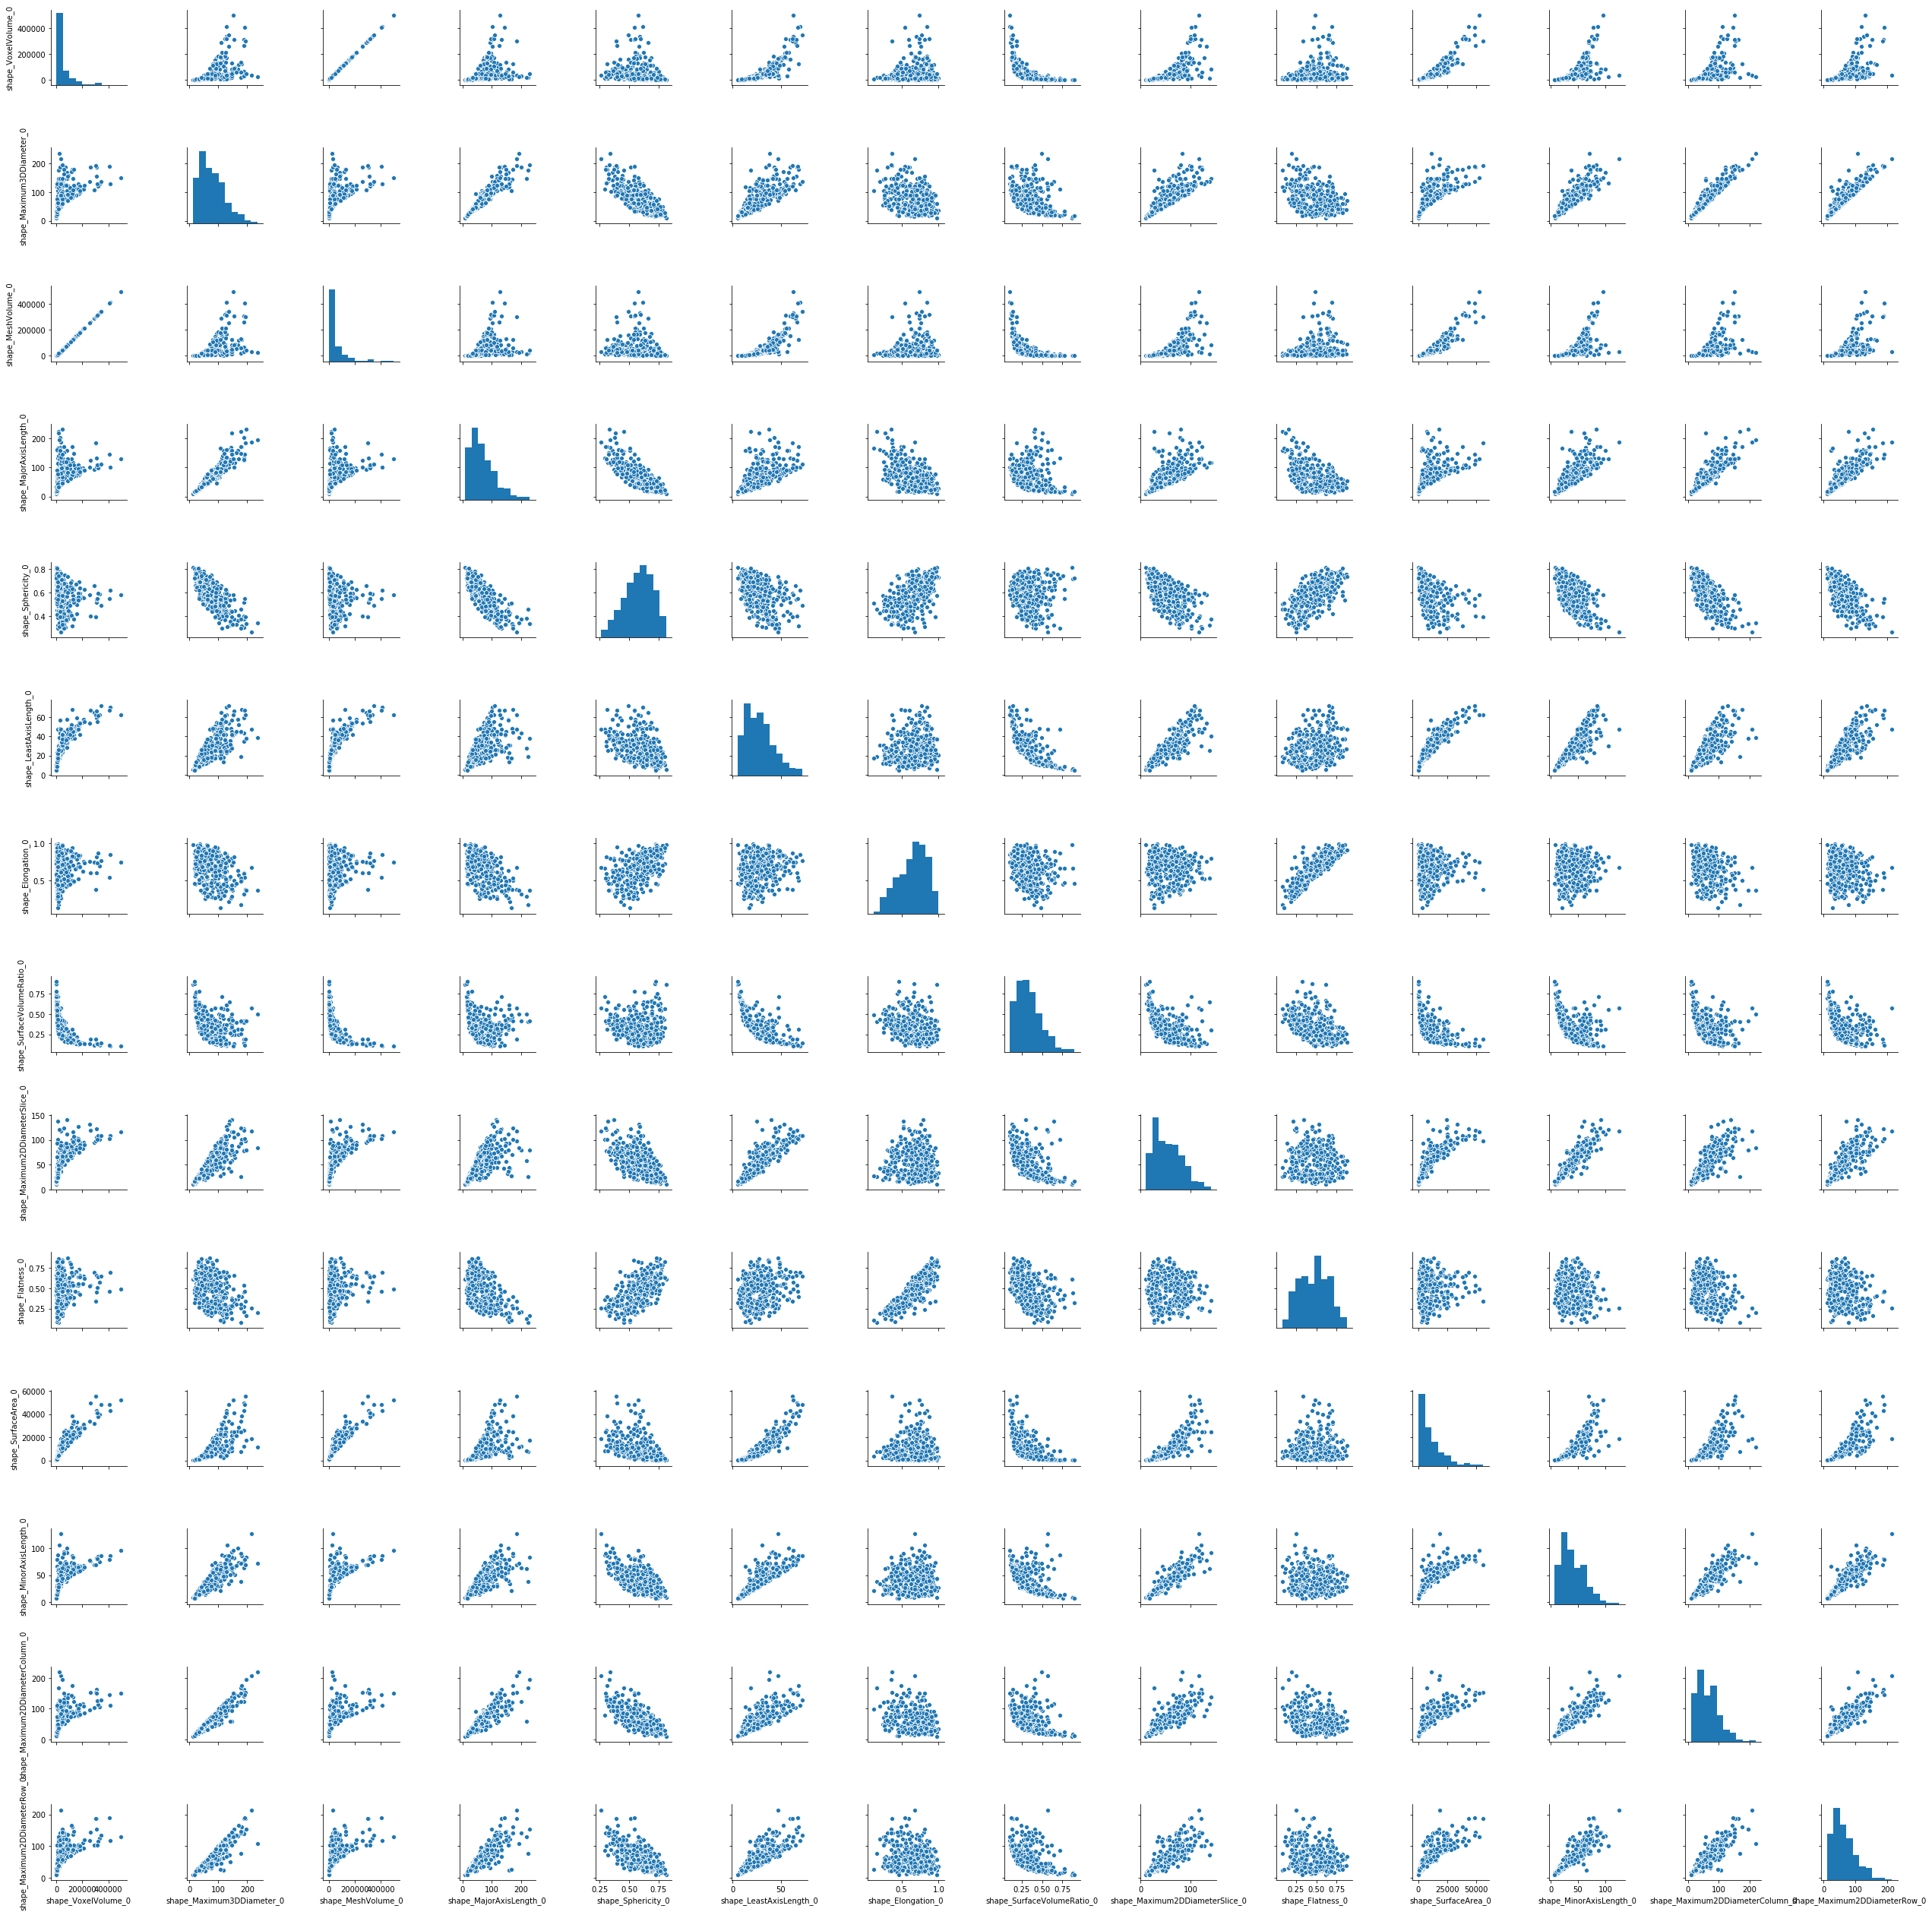

In [10]:
feat_0 = features.str.contains('_0')
feat_shape = features.str.contains('shape_')

features_shape = features[ feat_0 & feat_shape ]
sns.pairplot(X1_train[features_shape])

Some highly correlated variables:
- VoxelVolume and MeshVolume: will only keep VoxelVolume
- Maximum2DDiameterColumn, Maximum2DDiameterRow and Maximum3DDiameter: will only keep Maximum3DDiameter

Log transform some variables?
- VoxelVolume
- SurfaceArea

In [11]:
len(features[feat_0])

107

In [ ]:
feat_gldm = features.str.contains('gldm_')

features_gldm = features[ feat_0 & feat_gldm ]
sns.pairplot(X1_train[features_gldm])

In [ ]:
print(features_gldm)

High correlation:
- LargeDependenceEmphasis and DependenceVariance

Log transform(?):
- GrayLevelVariance
- DependenceNonUniformity
- GrayLevelNonUniformity
- LargeDependenceLowGrayLevelEmphasis
- SmallDependenceLowGrayLevelEmphasis
- LowGrayLevelEmphasis

In [ ]:
plt.figure()
plt.scatter(df_grand['gldm_LargeDependenceEmphasis_0'], df_grand['gldm_DependenceVariance_0'])
plt.show()

In [ ]:
print(df_grand['gldm_LargeDependenceEmphasis_0'].corr(df_grand['gldm_DependenceVariance_0']))

In [ ]:
feat_glcm = features.str.contains('glcm_')

features_glcm = features[ feat_0 & feat_glcm ]
sns.pairplot(X1_train[features_glcm])

In [ ]:
for fiter in features_glcm:
    for fiter2 in features_glcm:
        if (fiter <= fiter2):
            continue

        r = df_grand[fiter].corr(df_grand[fiter2])
            
        if (r>0.95):
            print(f'{fiter} highly correlated with {fiter2}: r={r}')

High correlation:
- SumAverage, JointAverage and AutoCorrelation
- SumEntropy, DifferenceEntropy and JointEntropy
- Idm and Id
- Idn and Idmn
- SumSquares and ClusterTendency
- DifferenceEntropy and DifferenceAverage (strong correspondence, not correlation in Pearson r's sense)
- DifferenceAverage and Contrast

Log transform(?):
- ldmn (reverse log transform for rising function)
- JointEnergy
- Contrast
- DifferenceVariance
- ldn (reverse log transform)
- SumSquares
- ClusterProminence
- ClusterTendency
- DifferenceAverage

Double peak
- Id

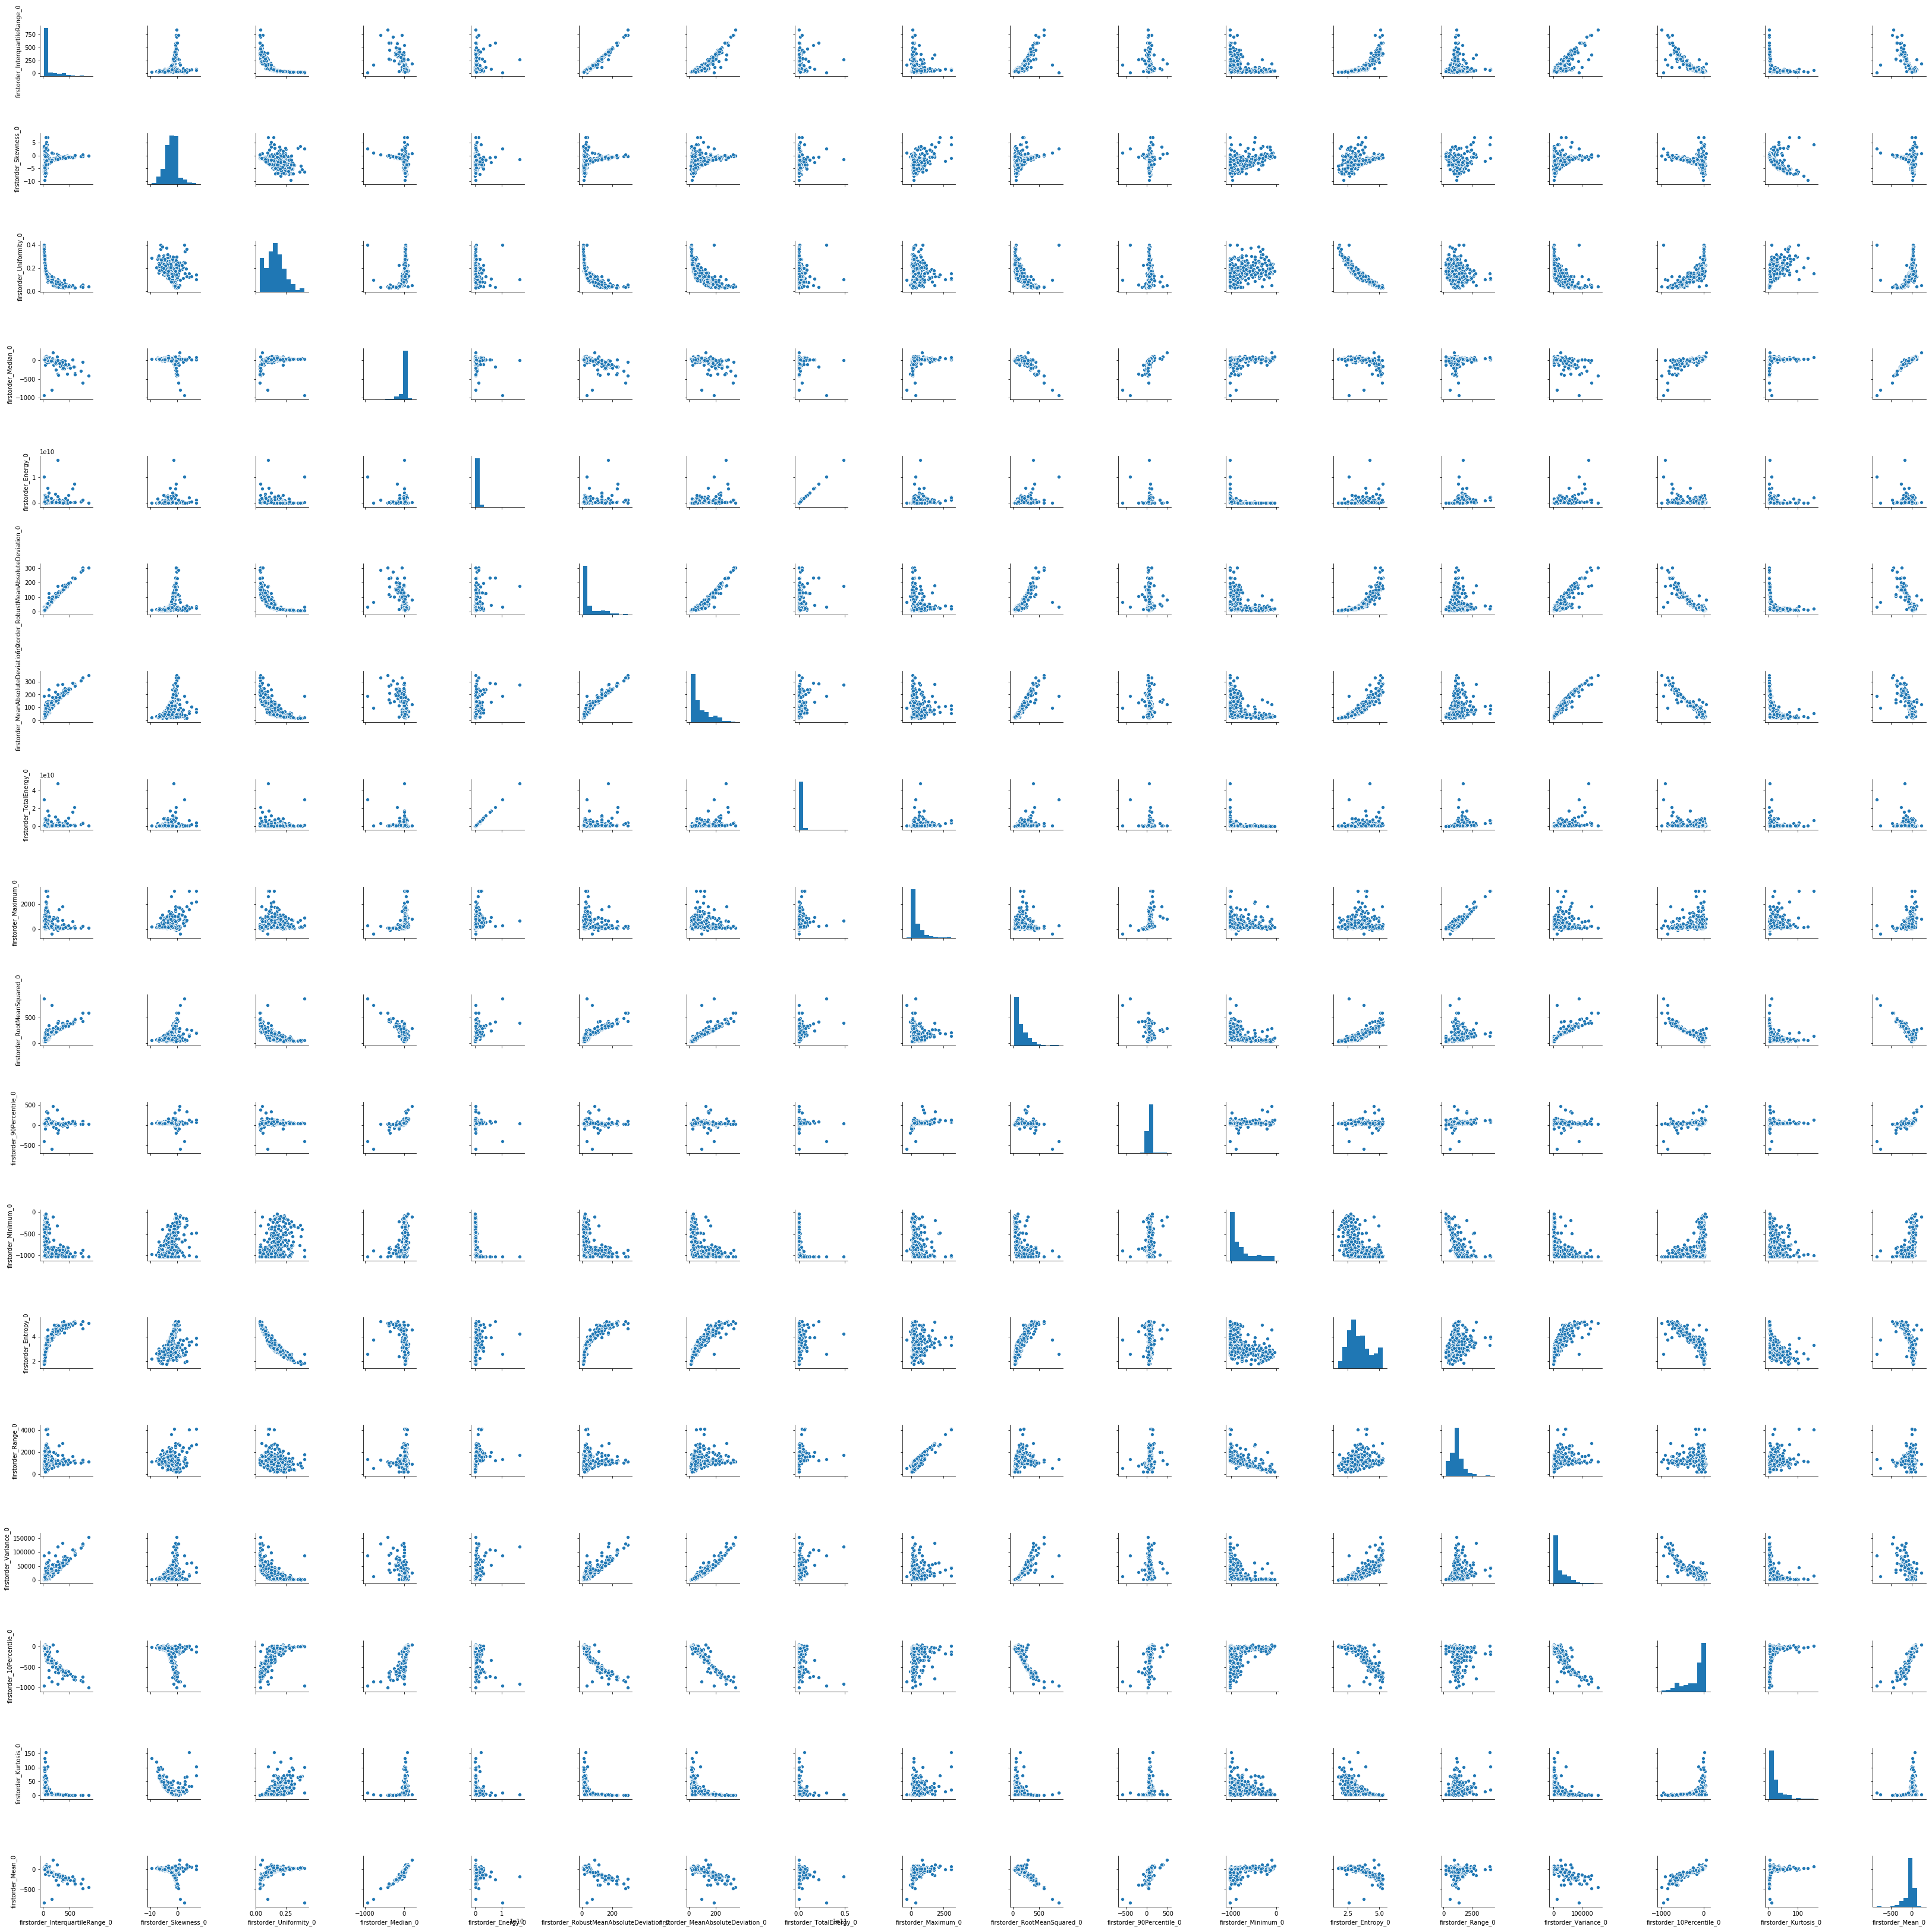

In [43]:
feat_firstorder = features.str.contains('firstorder_')

features_firstorder = features[ feat_0 & feat_firstorder ]
sns.pairplot(X1_train[features_firstorder])

In [44]:
for fiter in features_firstorder:
    for fiter2 in features_firstorder:
        if (fiter == fiter2):
            continue

        r = df_grand[fiter].corr(df_grand[fiter2])
            
        if (r>0.95):
            print(f'{fiter} highly correlated with {fiter2}: r={r}')

firstorder_InterquartileRange_0 highly correlated with firstorder_RobustMeanAbsoluteDeviation_0: r=0.9865762653618481
firstorder_Energy_0 highly correlated with firstorder_TotalEnergy_0: r=0.9993594025084611
firstorder_RobustMeanAbsoluteDeviation_0 highly correlated with firstorder_InterquartileRange_0: r=0.9865762653618482
firstorder_RobustMeanAbsoluteDeviation_0 highly correlated with firstorder_MeanAbsoluteDeviation_0: r=0.953858688639902
firstorder_MeanAbsoluteDeviation_0 highly correlated with firstorder_RobustMeanAbsoluteDeviation_0: r=0.9538586886399019
firstorder_MeanAbsoluteDeviation_0 highly correlated with firstorder_Variance_0: r=0.9694007350612792
firstorder_TotalEnergy_0 highly correlated with firstorder_Energy_0: r=0.999359402508461
firstorder_Variance_0 highly correlated with firstorder_MeanAbsoluteDeviation_0: r=0.9694007350612792


High correlation:
- InterquartileRange, RobustMeanAbsoluteDeviation and MeanAbsoluteDeviation
- Energy and TotalEnergy
- Variance and MeanAbsoluteDeviation

Log transform(?):
- InterquartileRange
- Median (inverse log)
- Energy
- RobustMeanAbsoluteDeviation
- MeanAbsoluteDeviation
- TotalEnergy
- Maximum
- RootMeanSquare
- Minimum
- Kurtosis

Double peaks
- 10Percentile

In [ ]:
feat_glrlm = features.str.contains('glrlm_')

features_glrlm = features[ feat_0 & feat_glrlm ]
sns.pairplot(X1_train[features_glrlm])

In [ ]:
for fiter in features_glrlm:
    for fiter2 in features_glrlm:
        if (fiter == fiter2):
            continue

        r = df_grand[fiter].corr(df_grand[fiter2])
            
        if (r>0.95):
            print(f'{fiter} highly correlated with {fiter2}: r={r}')

High correlation:
- ShortRunLowGrayLevelEmphasis, LowGrayLevelRunEmphasis, HighGrayLevelRunEmphasis
- RunVariance, LongRunEmphasis
- RunLengthNonUniformityNormalized, ShortRunEmphasis, RunPercentage

Log transform(?):
- ShortRunLowGrayLevelEmphasis
- GrayLevelVariance
- LowGrayLevelRunEmphasis
- RunVariance
- GrayLevelNonUniformity
- RunLengthNonUniformity
- LongRunLowGrayLevelEmphasis

In [ ]:
feat_glszm = features.str.contains('glszm_')

features_glszm = features[ feat_0 & feat_glszm ]
sns.pairplot(X1_train[features_glszm])

In [ ]:
for fiter in features_glszm:
    for fiter2 in features_glszm:
        if (fiter == fiter2):
            continue

        r = df_grand[fiter].corr(df_grand[fiter2])
            
        if (r>0.95):
            print(f'{fiter} highly correlated with {fiter2}: r={r}')

High correlations:
- ZoneVariance, LargeAreaEmphasis, LargeAreaHighGrayLevelEmphasis
- SizeZoneNonUniformityNormalized, SmallAreaEmphasis
- SmallAreaHighGrayLevelEmphasis, HighGrayLevelZoneEmphasis
- LowGrayLevelZoneEmphasis, SmallAreaLowGrayLevelEmphasis

Log transform(?):
- GrayLevelVariance
- ZoneVariance
- GrayLevelNonUniformityNormalized
- SizeZoneNonUniformity
- GrayLevelNonUniformity
- LargeAreaEmphasis
- ZonePercentage (maybe)
- LargeAreaLowGrayLevelEmphasis
- LargeAreaHighGrayLevelEmphasis
- LowGrayLevelZoneEmphasis
- SmallAreaLowGrayLevelEmphasis

In [ ]:
feat_ngtdm = features.str.contains('ngtdm_')

features_ngtdm = features[ feat_0 & feat_ngtdm ]
sns.pairplot(X1_train[features_ngtdm])

In [ ]:
for fiter in features_ngtdm:
    for fiter2 in features_ngtdm:
        if (fiter == fiter2):
            continue

        r = df_grand[fiter].corr(df_grand[fiter2])
            
        if (r>0.95):
            print(f'{fiter} highly correlated with {fiter2}: r={r}')

High correlation:
- None

Log transform:
- All of them

In [ ]:
df_summary = df_grand[ features[feat_0] ].describe().transpose()
df_summary[df_summary[min]<=0]

QQ-plots after log transforms:

In [ ]:
qqplot( np.log(df_grand['ngtdm_Coarseness_0']), line='s' )

In [ ]:
qqplot( np.log(df_grand['ngtdm_Complexity_0']), line='s' )

In [ ]:
qqplot( np.log(df_grand['ngtdm_Strength_0']), line='s' )

In [ ]:
qqplot( np.log(df_grand['ngtdm_Contrast_0']), line='s' )

In [ ]:
qqplot( np.log(df_grand['ngtdm_Busyness_0']), line='s' )

For glszm
- GrayLevelVariance
- ZoneVariance
- GrayLevelNonUniformityNormalized
- SizeZoneNonUniformity
- GrayLevelNonUniformity
- LargeAreaEmphasis
- ZonePercentage (maybe)
- LargeAreaLowGrayLevelEmphasis
- LargeAreaHighGrayLevelEmphasis
- LowGrayLevelZoneEmphasis
- SmallAreaLowGrayLevelEmphasis

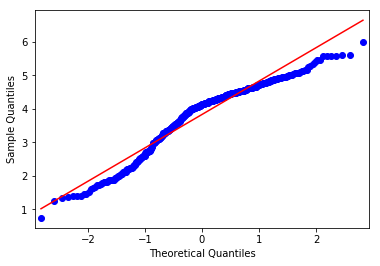

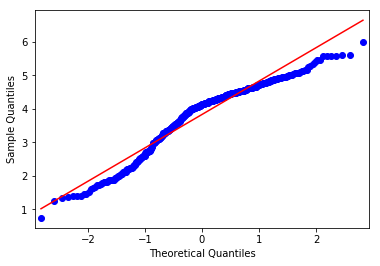

In [47]:
qqplot( np.log(df_grand['glszm_GrayLevelVariance_0']), line='s' )

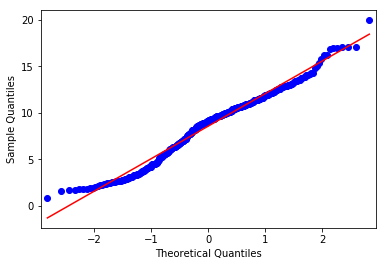

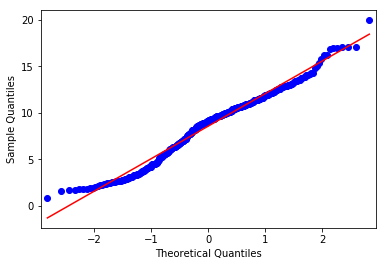

In [48]:
qqplot( boxcox(df_grand['glszm_GrayLevelVariance_0'])[0], line='s' )

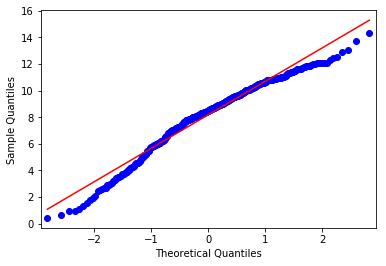

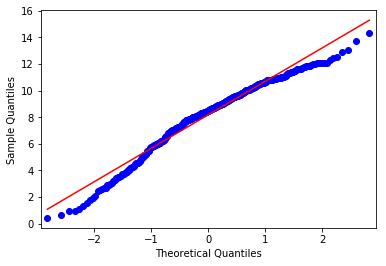

In [49]:
qqplot( np.log(df_grand['glszm_ZoneVariance_0']), line='s' )

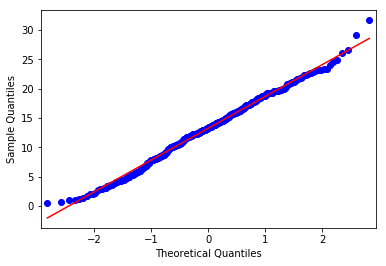

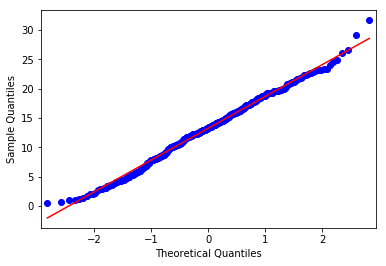

In [50]:
qqplot( boxcox(df_grand['glszm_ZoneVariance_0'])[0], line='s' )

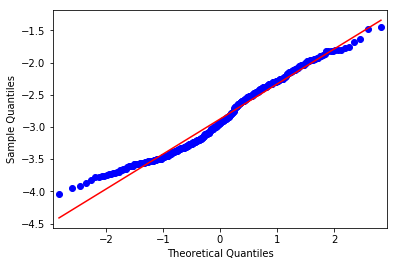

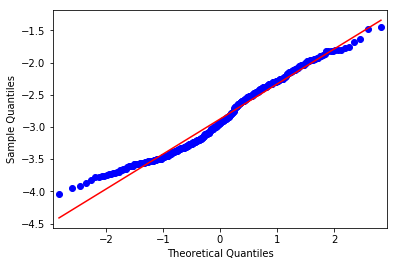

In [51]:
qqplot( np.log(df_grand['glszm_GrayLevelNonUniformityNormalized_0']), line='s' )

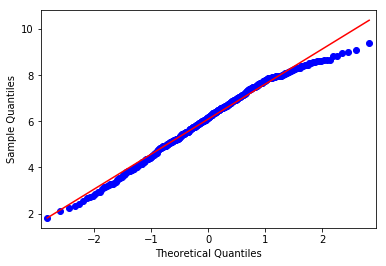

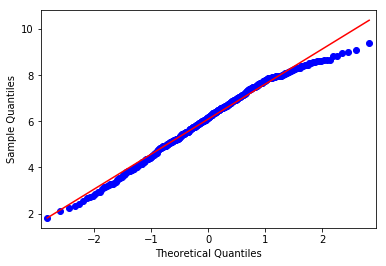

In [52]:
qqplot( np.log(df_grand['glszm_SizeZoneNonUniformity_0']), line='s' )

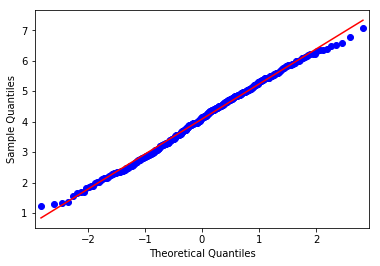

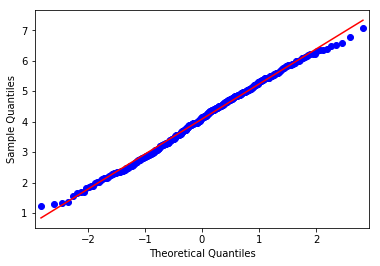

In [53]:
qqplot( np.log(df_grand['glszm_GrayLevelNonUniformity_0']), line='s' )

In [ ]:
qqplot( np.log(df_grand['glszm_LargeAreaEmphasis_0']), line='s' )

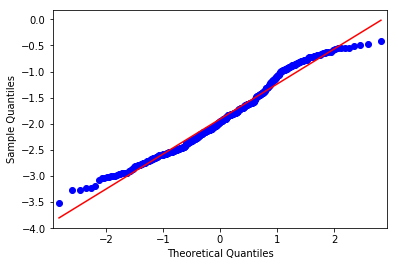

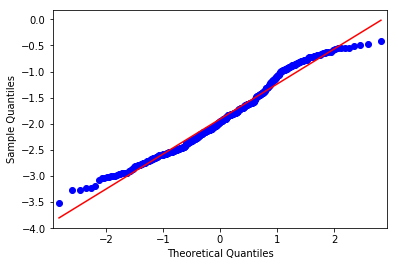

In [54]:
qqplot( np.log(df_grand['glszm_ZonePercentage_0']), line='s' )

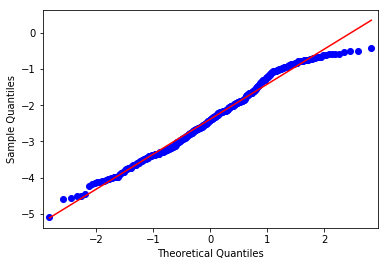

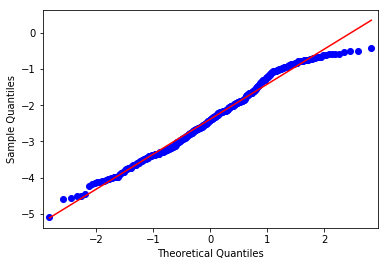

In [55]:
qqplot( boxcox(df_grand['glszm_ZonePercentage_0'])[0], line='s' )

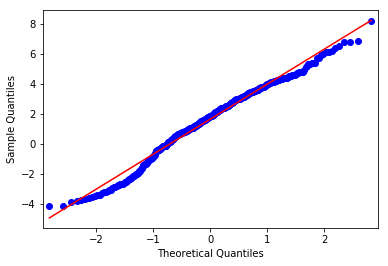

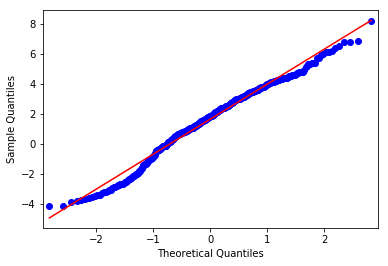

In [56]:
qqplot( np.log(df_grand['glszm_LargeAreaLowGrayLevelEmphasis_0']), line='s' )

In [ ]:
qqplot( np.log(df_grand['glszm_LargeAreaHighGrayLevelEmphasis_0']), line='s' )

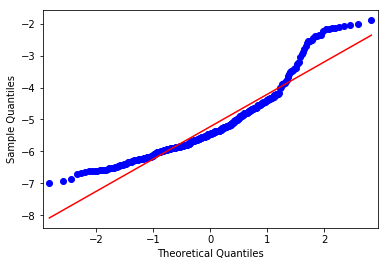

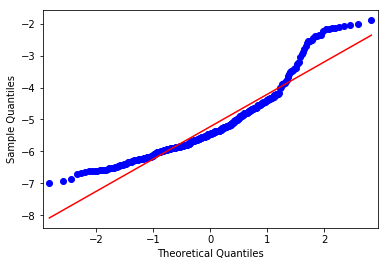

In [9]:
# Terrible after logging
qqplot( np.log(df_grand['glszm_LowGrayLevelZoneEmphasis_0']), line='s' )

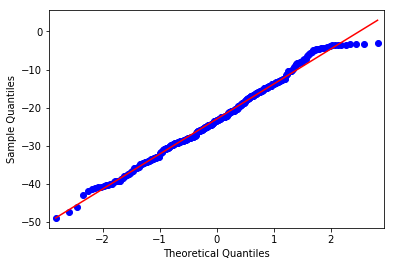

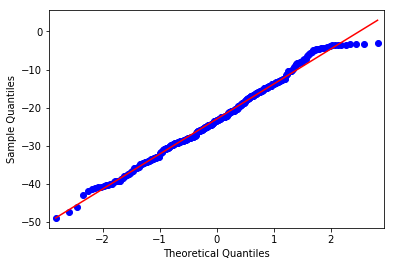

In [15]:
boxcox_lglze, _ = boxcox(df_grand['glszm_LowGrayLevelZoneEmphasis_0'])
qqplot( boxcox_lglze, line='s' )

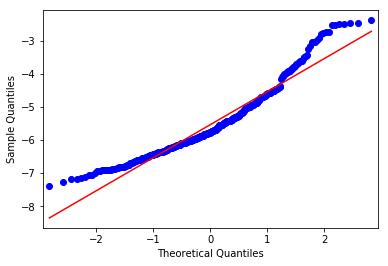

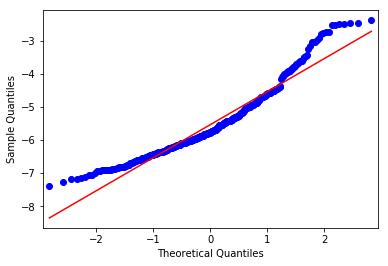

In [16]:
# Not great
qqplot( np.log(df_grand['glszm_SmallAreaLowGrayLevelEmphasis_0']), line='s' )

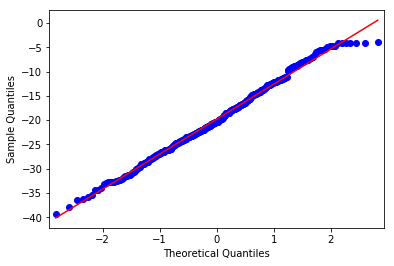

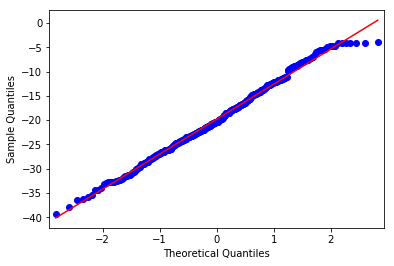

In [17]:
boxcox_salgle, _ = boxcox(df_grand['glszm_SmallAreaLowGrayLevelEmphasis_0'])
qqplot(boxcox_salgle, line='s')

Log transform(?):
- ShortRunLowGrayLevelEmphasis
- GrayLevelVariance
- LowGrayLevelRunEmphasis
- RunVariance
- GrayLevelNonUniformity
- RunLengthNonUniformity
- LongRunLowGrayLevelEmphasis

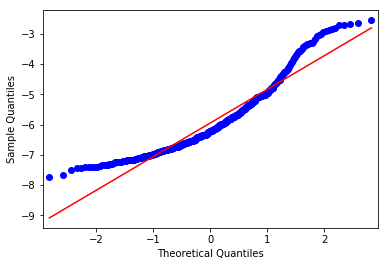

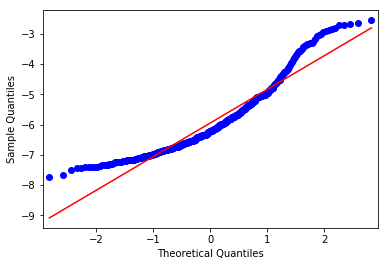

In [10]:
# Not great
qqplot( np.log(df_grand['glrlm_ShortRunLowGrayLevelEmphasis_0']), line='s' )

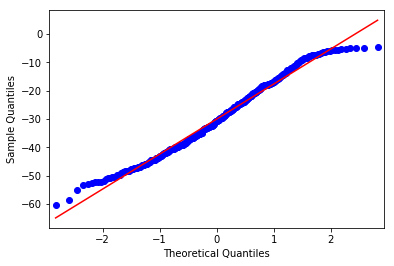

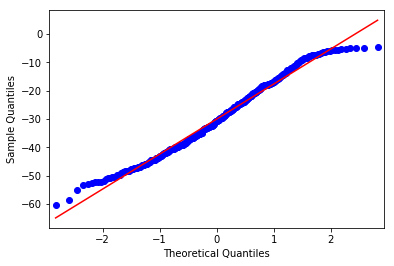

In [12]:
qqplot( boxcox(df_grand['glrlm_ShortRunLowGrayLevelEmphasis_0'])[0], line='s' )

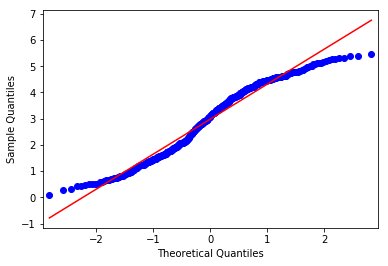

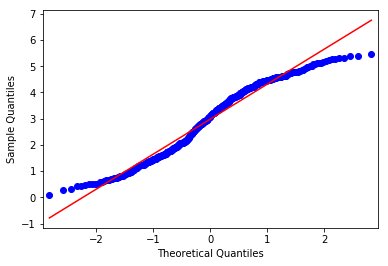

In [11]:
# Not great
qqplot( np.log(df_grand['glrlm_GrayLevelVariance_0']), line='s' )

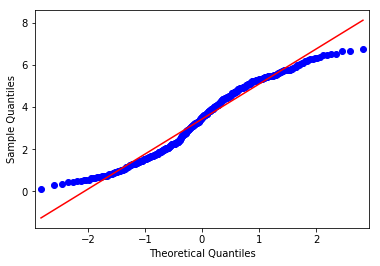

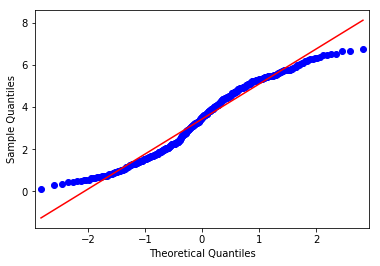

In [13]:
qqplot( boxcox(df_grand['glrlm_GrayLevelVariance_0'])[0], line='s' )

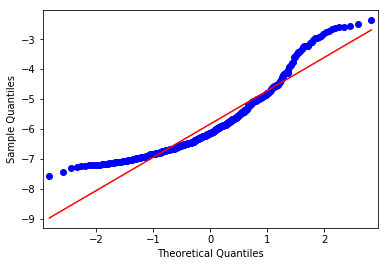

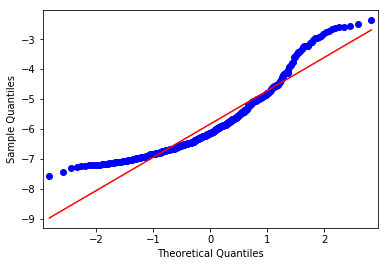

In [15]:
# NOt great
qqplot( np.log(df_grand['glrlm_LowGrayLevelRunEmphasis_0']), line='s' )

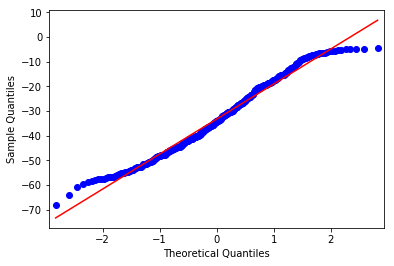

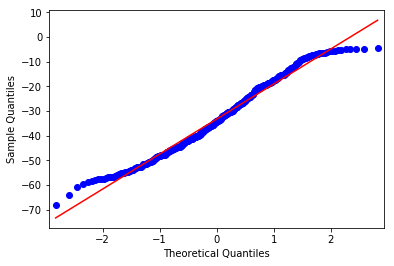

In [14]:
qqplot( boxcox(df_grand['glrlm_LowGrayLevelRunEmphasis_0'])[0], line='s' )

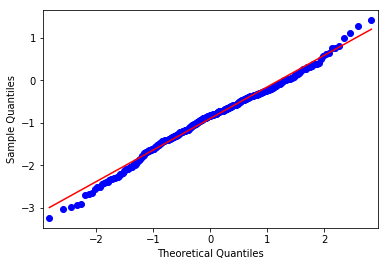

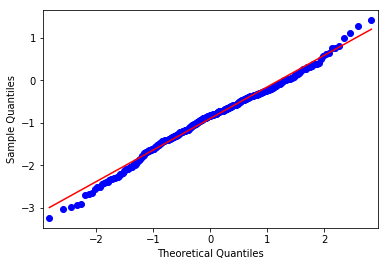

In [16]:
qqplot( np.log(df_grand['glrlm_RunVariance_0']), line='s' )

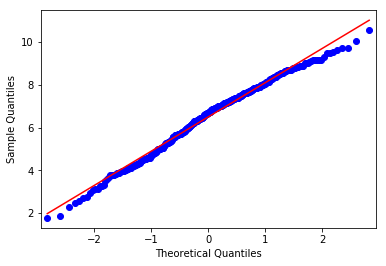

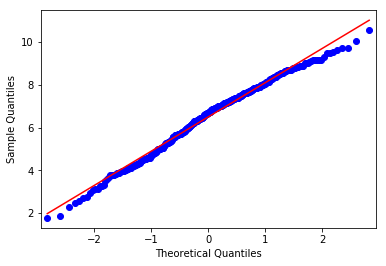

In [17]:
qqplot( np.log(df_grand['glrlm_GrayLevelNonUniformity_0']), line='s' )

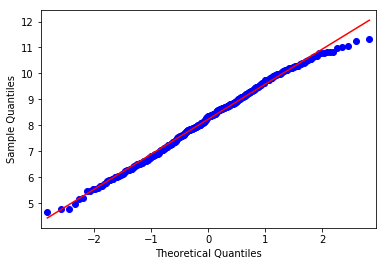

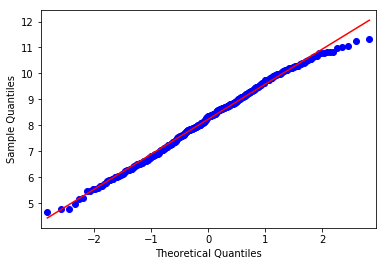

In [18]:
qqplot( np.log(df_grand['glrlm_RunLengthNonUniformity_0']), line='s' )

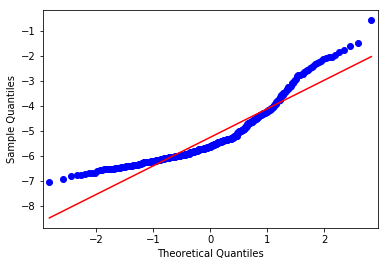

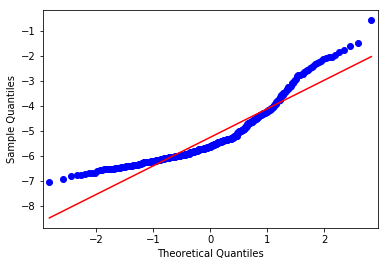

In [25]:
# Not great
qqplot( np.log(df_grand['glrlm_LongRunLowGrayLevelEmphasis_0']), line='s' )

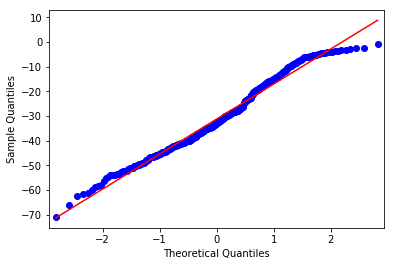

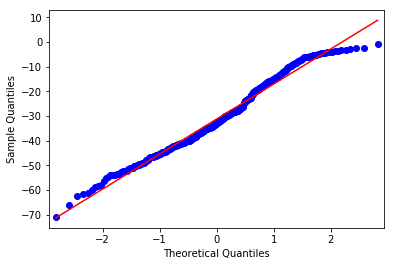

In [23]:
qqplot( boxcox(df_grand['glrlm_LongRunLowGrayLevelEmphasis_0'])[0], line='s' )

GLCM - Log transform(?):
- ldmn (reverse log transform for rising function) $\rightarrow$ omitted here
- JointEnergy $\rightarrow$ Box-Cox works better
- Contrast
- DifferenceVariance
- ldn (reverse log transform)
- SumSquares
- ClusterProminence
- ClusterTendency
- DifferenceAverage

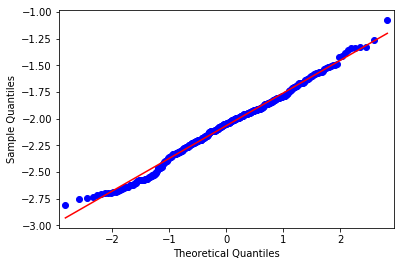

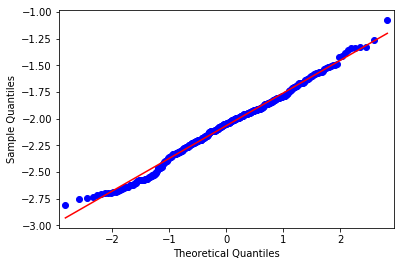

In [27]:
qqplot( boxcox(df_grand['glcm_JointEnergy_0'])[0], line='s' )

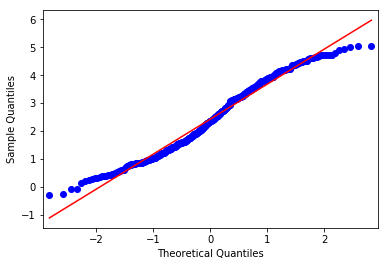

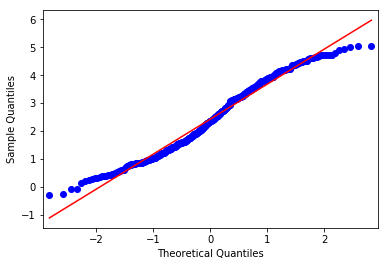

In [30]:
# Tails not matching
qqplot( np.log(df_grand['glcm_Contrast_0']), line='s' )

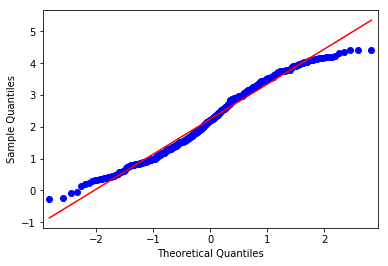

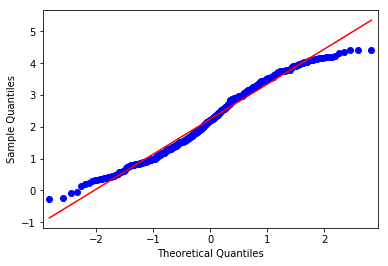

In [15]:
qqplot( boxcox(df_grand['glcm_Contrast_0'])[0], line='s' )

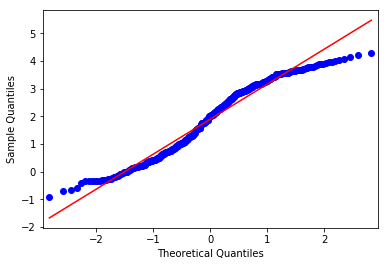

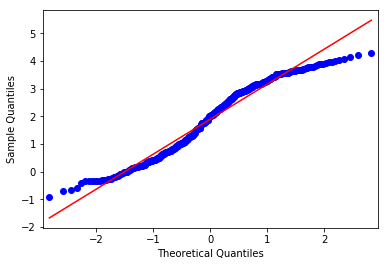

In [32]:
# Tails not matching
qqplot( np.log(df_grand['glcm_DifferenceVariance_0']), line='s' )

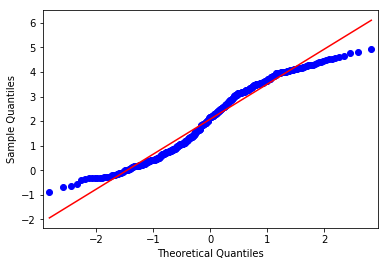

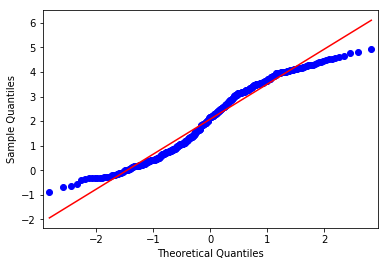

In [16]:
qqplot( boxcox(df_grand['glcm_DifferenceVariance_0'])[0], line='s' )

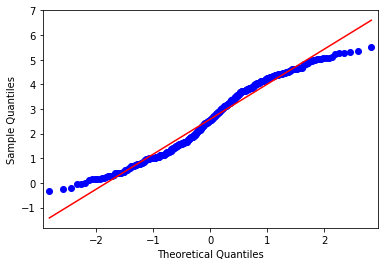

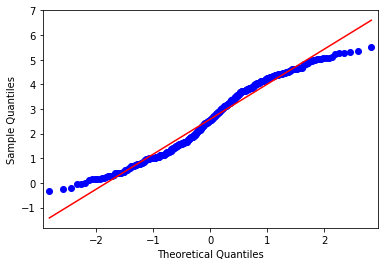

In [34]:
# Tails not matching
qqplot( np.log(df_grand['glcm_SumSquares_0']), line='s' )

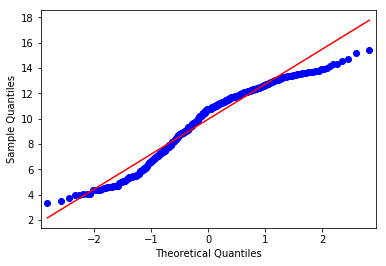

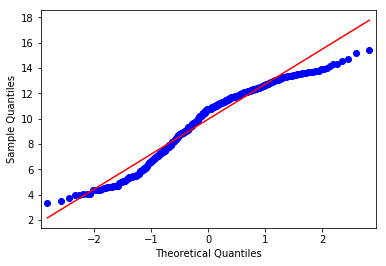

In [38]:
# Not great
qqplot( np.log(df_grand['glcm_ClusterProminence_0']), line='s' )

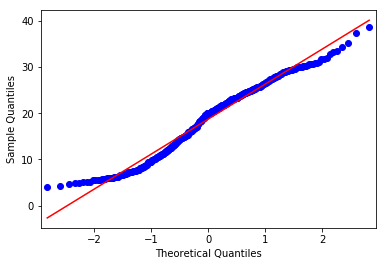

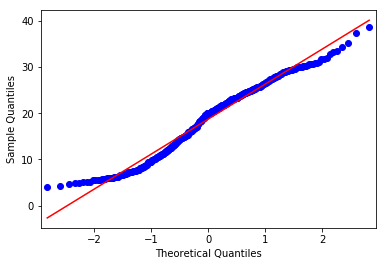

In [17]:
qqplot( boxcox(df_grand['glcm_ClusterProminence_0'])[0], line='s' )

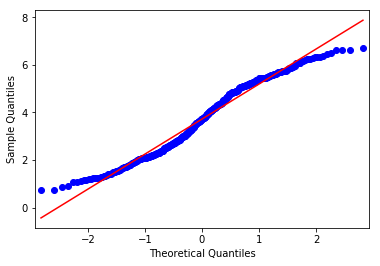

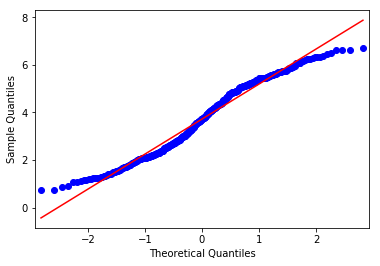

In [39]:
# Tails not matching
qqplot( np.log(df_grand['glcm_ClusterTendency_0']), line='s' )

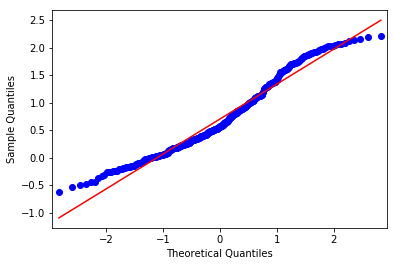

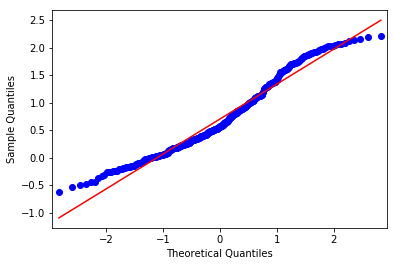

In [40]:
# Tails not matching
qqplot( np.log(df_grand['glcm_DifferenceAverage_0']), line='s' )

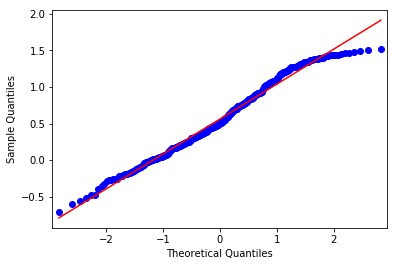

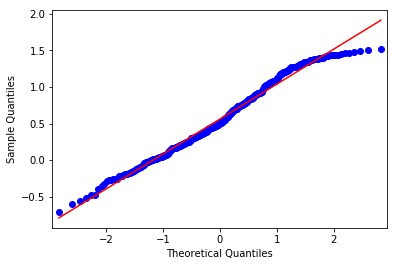

In [18]:
qqplot( boxcox(df_grand['glcm_DifferenceAverage_0'])[0], line='s' )

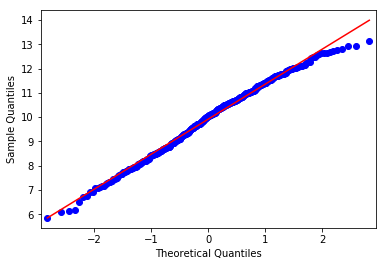

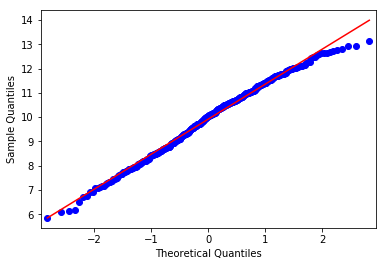

In [41]:
qqplot( np.log(df_grand['shape_VoxelVolume_0']), line='s' )

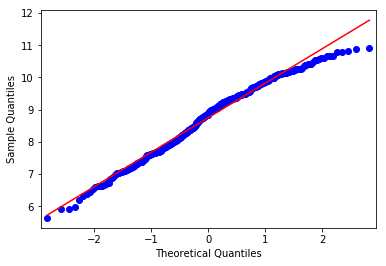

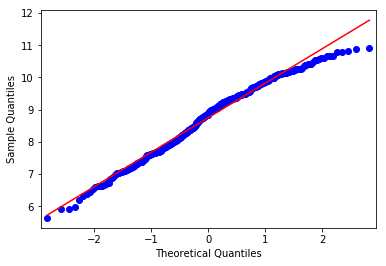

In [42]:
qqplot( np.log(df_grand['shape_SurfaceArea_0']), line='s' )

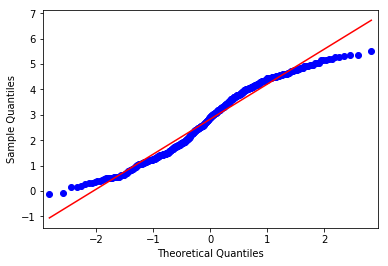

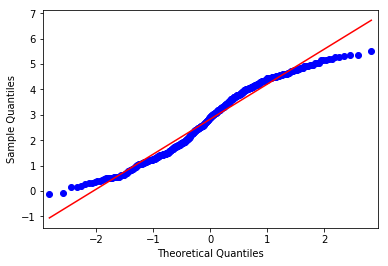

In [23]:
qqplot( np.log(df_grand['gldm_GrayLevelVariance_0']), line='s' )

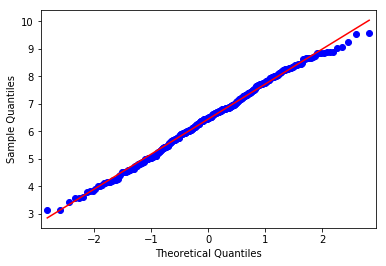

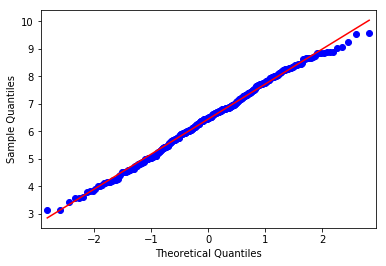

In [24]:
qqplot( np.log(df_grand['gldm_DependenceNonUniformity_0']), line='s' )

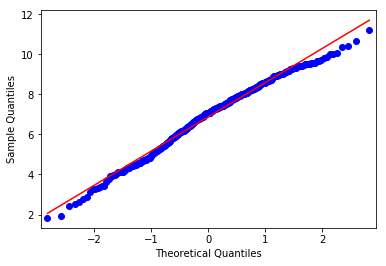

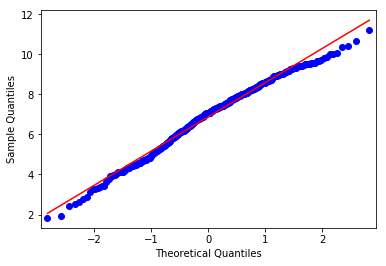

In [25]:
qqplot( np.log(df_grand['gldm_GrayLevelNonUniformity_0']), line='s' )

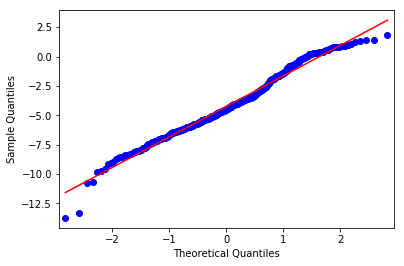

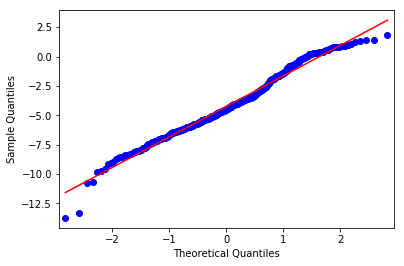

In [28]:
qqplot( boxcox(df_grand['gldm_LargeDependenceLowGrayLevelEmphasis_0'])[0], line='s' )

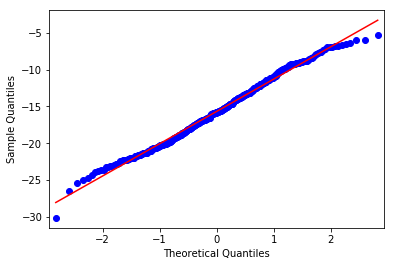

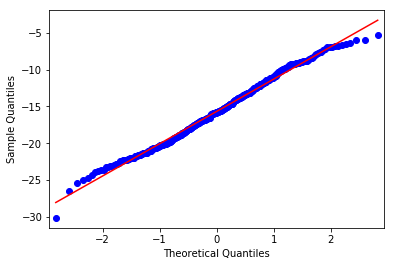

In [31]:
qqplot( boxcox(df_grand['gldm_SmallDependenceLowGrayLevelEmphasis_0'])[0], line='s' )

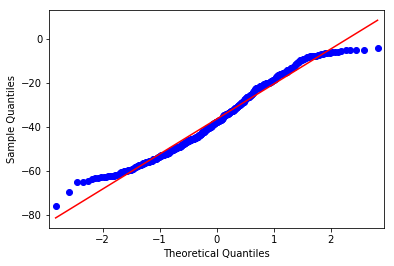

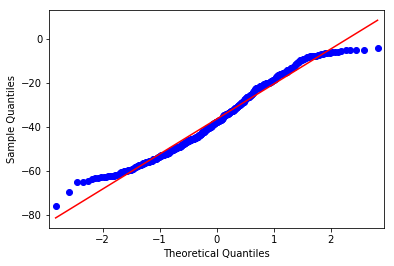

In [33]:
qqplot( boxcox(df_grand['gldm_LowGrayLevelEmphasis_0'])[0], line='s' )

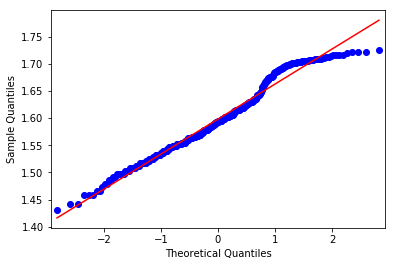

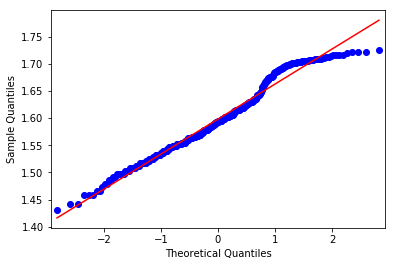

In [35]:
qqplot( boxcox(df_grand['firstorder_InterquartileRange_0'])[0], line='s' )

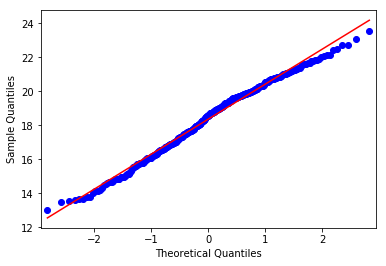

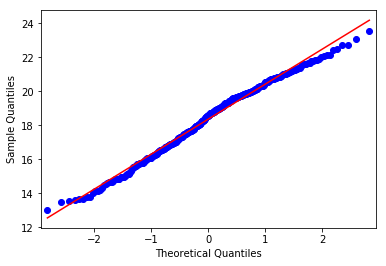

In [36]:
qqplot( np.log(df_grand['firstorder_Energy_0']), line='s' )

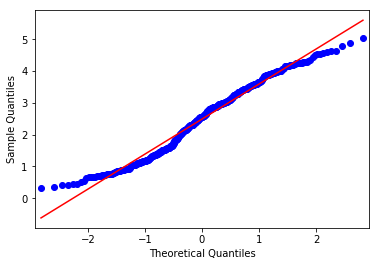

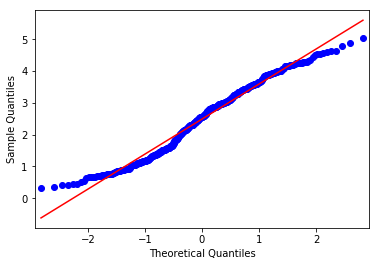

In [41]:
qqplot( np.log(df_grand['firstorder_Kurtosis_0']), line='s' )

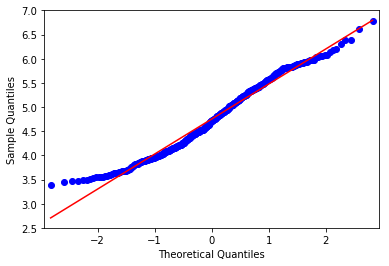

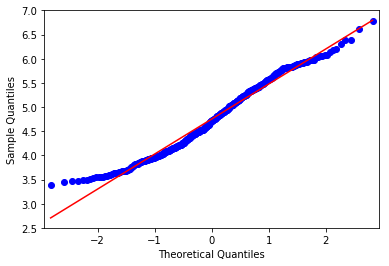

In [46]:
qqplot( np.log(df_grand['firstorder_RootMeanSquared_0']), line='s' )